In [1]:
options(warn = -1, tidyverse.quiet = T)

library(tidyverse, warn.conflicts = F, quietly = T)
library(arrow, warn.conflicts = F)
library(cowplot, warn.conflicts = F)
library(yardstick, warn.conflicts = F)
library(magick, warn.conflicts = F, quiet = T)

Linking to ImageMagick 7.1.1.28
Enabled features: cairo, fontconfig, freetype, fftw, rsvg, webp, x11
Disabled features: ghostscript, heic, lcms, pango, raw



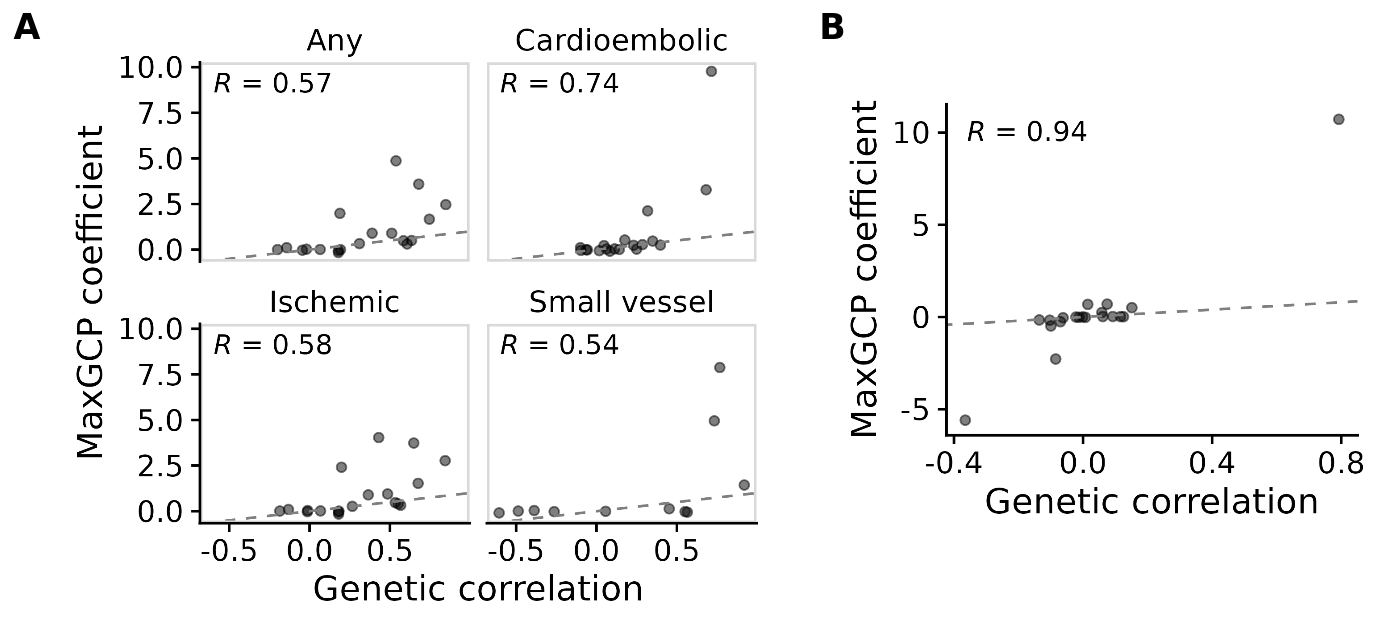

In [48]:
mega_rg_vs_coef_plot <- ggdraw() + "2.megastroke/img/rg_vs_coef.png" %>% image_read %>% draw_image
alz_rg_vs_coef_plot <- ggdraw() + "3.alzheimers/img/rg_vs_coef.png" %>% image_read %>% draw_image

options(repr.plot.width = 5.5, repr.plot.height = 2.5, repr.plot.res = 250)

merged_rg_vs_coef_plot <- plot_grid(
    mega_rg_vs_coef_plot,
    alz_rg_vs_coef_plot,
    nrow = 1,
    labels = "AUTO",
    label_size = 10,
    rel_widths = c(1, 0.65),
    label_x = c(0, -0.05)
)

save_plot("img/rg_vs_coef.png", merged_rg_vs_coef_plot, base_width = 5.5, base_height = 2.5, 
          dpi = 400, bg = "white")

merged_rg_vs_coef_plot

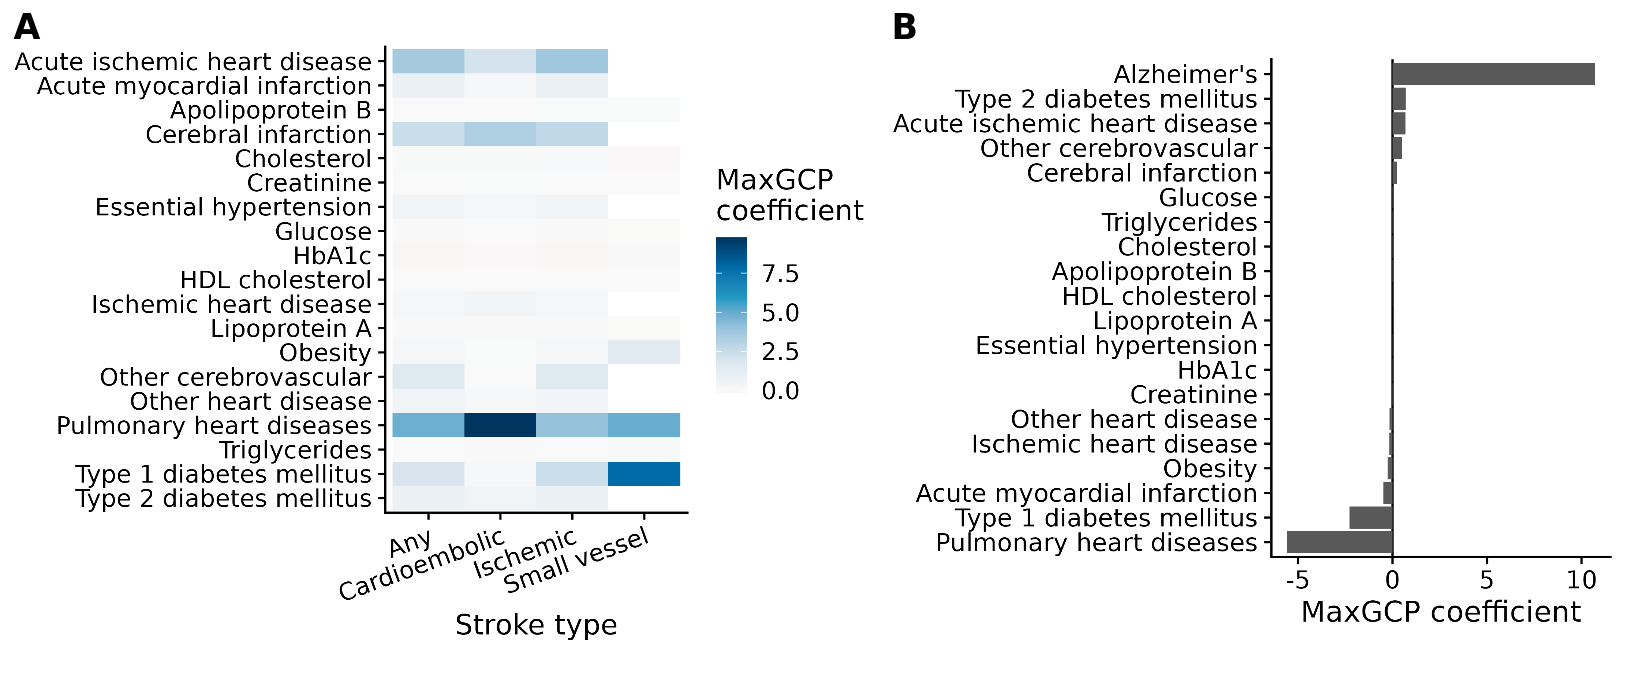

In [66]:
mega_coef_plot <- ggdraw() + "2.megastroke/img/maxgcp_coef.png" %>% image_read %>% draw_image
alz_coef_plot <- ggdraw() + "3.alzheimers/img/maxgcp_coef.png" %>% image_read %>% draw_image

options(repr.plot.width = 6.5, repr.plot.height = 2.75, repr.plot.res = 250)

merged_coef_plot <- plot_grid(
    mega_coef_plot,
    alz_coef_plot,
    nrow = 1,
    labels = "AUTO",
    label_size = 10,
    rel_widths = c(1, 0.85),
    label_x = c(0, 0)
)

save_plot("img/maxgcp_coef.png", merged_coef_plot, base_width = 6.5, base_height = 2.75, 
          dpi = 400, bg = "white")

merged_coef_plot

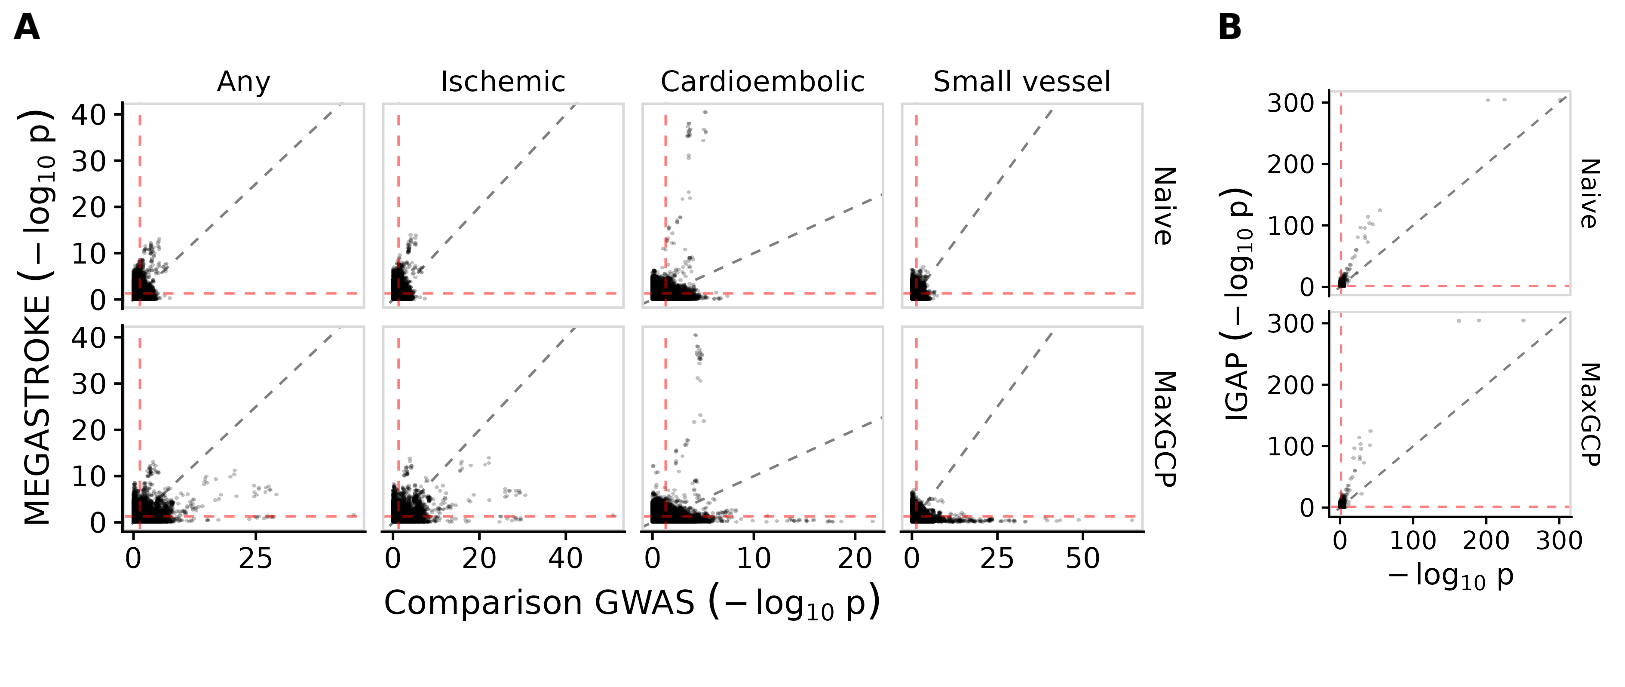

In [67]:
mega_plot <- ggdraw() + "2.megastroke/img/p_vs_p.png" %>% image_read %>% draw_image
alz_plot <- ggdraw() + "3.alzheimers/img/p_vs_p_vertical.png" %>% image_read %>% draw_image

options(repr.plot.width = 6.5, repr.plot.height = 2.75, repr.plot.res = 250)

merged_plot <- plot_grid(
    mega_plot,
    alz_plot,
    nrow = 1,
    labels = "AUTO",
    align = "hv",
    axis = "tb",
    label_size = 10,
    rel_widths = c(1, 0.35),
    label_x = c(0, 0)
)

save_plot("img/p_vs_p.png", merged_plot, base_width = 6.5, base_height = 2.75, 
          dpi = 400, bg = "white")

merged_plot

# Externally combine sensitivity/specificity plots

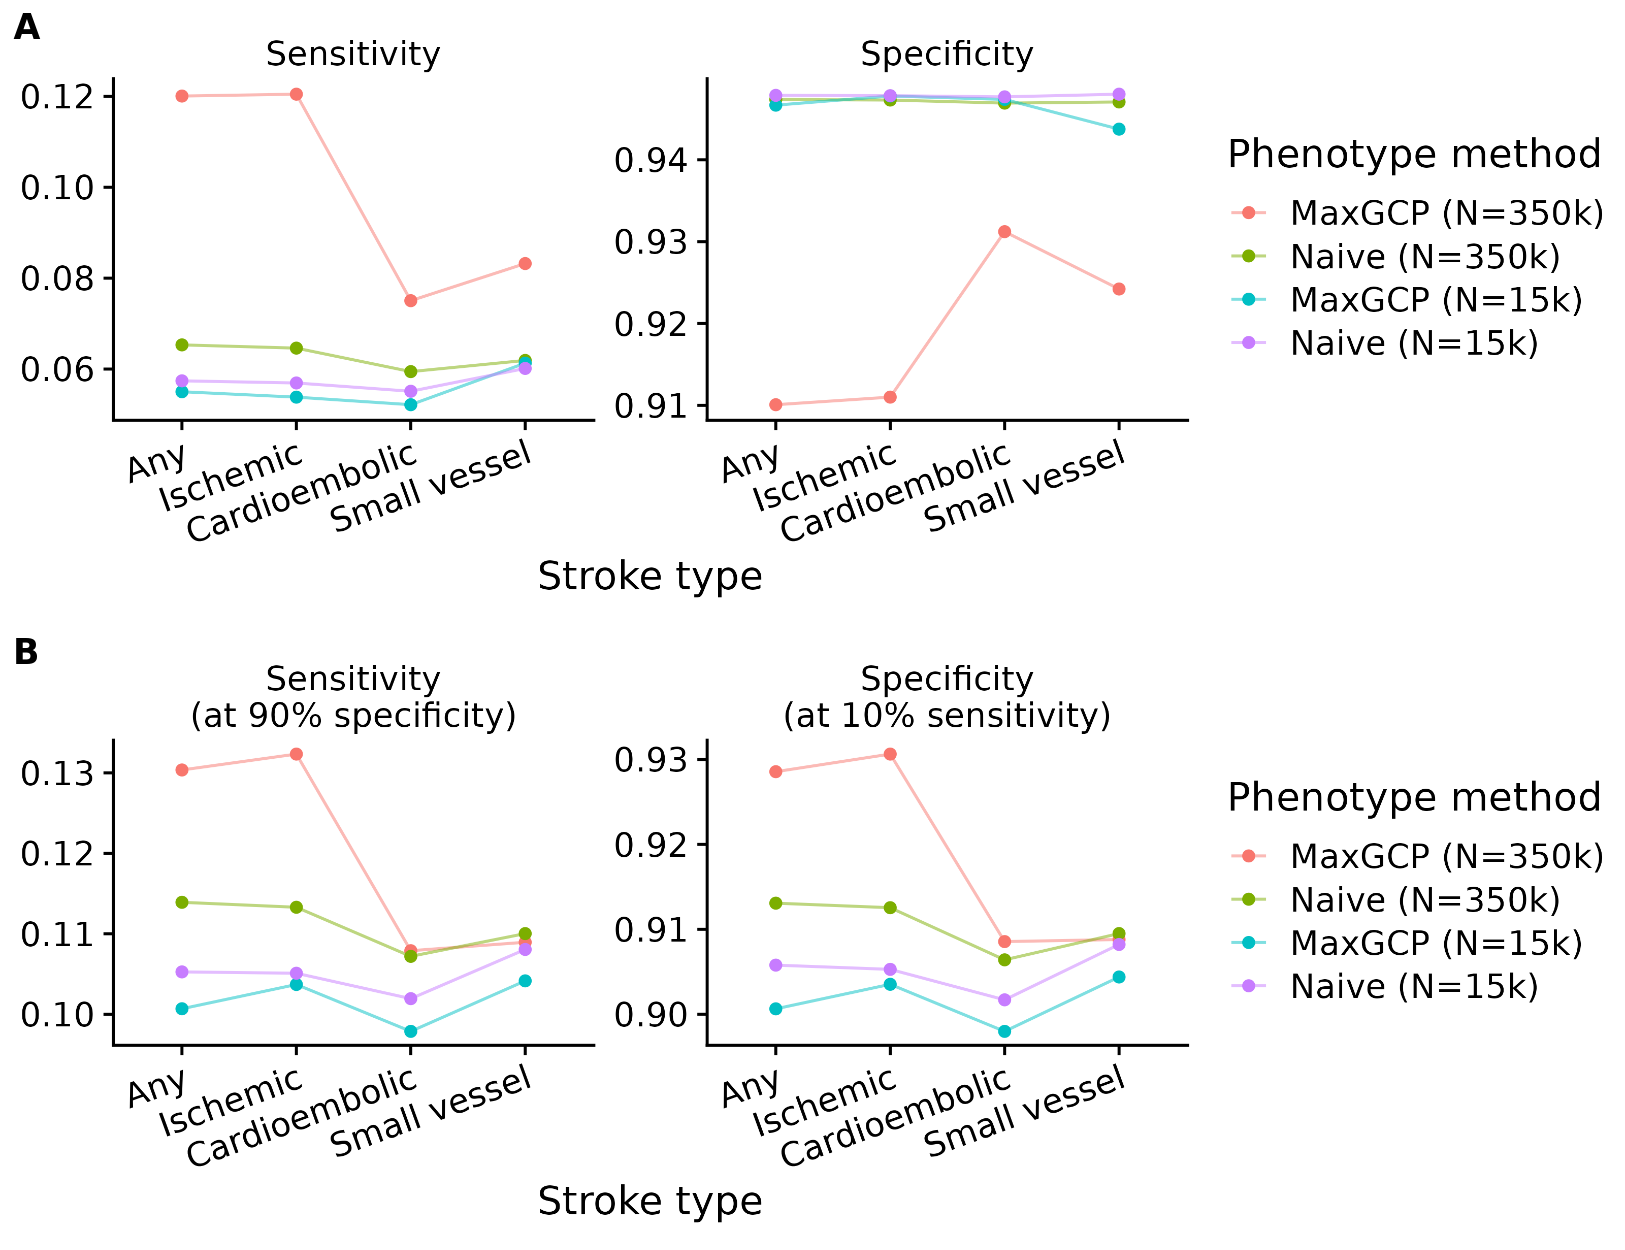

In [73]:
raw_plot <- ggdraw() + "2.megastroke/img/sens_spec.png" %>% image_read %>% draw_image
tar_plot <- ggdraw() + "2.megastroke/img/target_sens_spec.png" %>% image_read %>% draw_image

options(repr.plot.width = 6.5, repr.plot.height = 5, repr.plot.res = 250)

merged_plot <- plot_grid(
    raw_plot,
    tar_plot,
    ncol = 1,
    labels = "AUTO",
    align = "hv",
    axis = "tb",
    label_size = 10,
    rel_widths = c(1, 0.35),
    label_x = c(0, 0)
)

# save_plot("img/mega_sens_spec.png", merged_plot, base_width = 6.5, base_height = 5, 
#           dpi = 400, bg = "white")

merged_plot

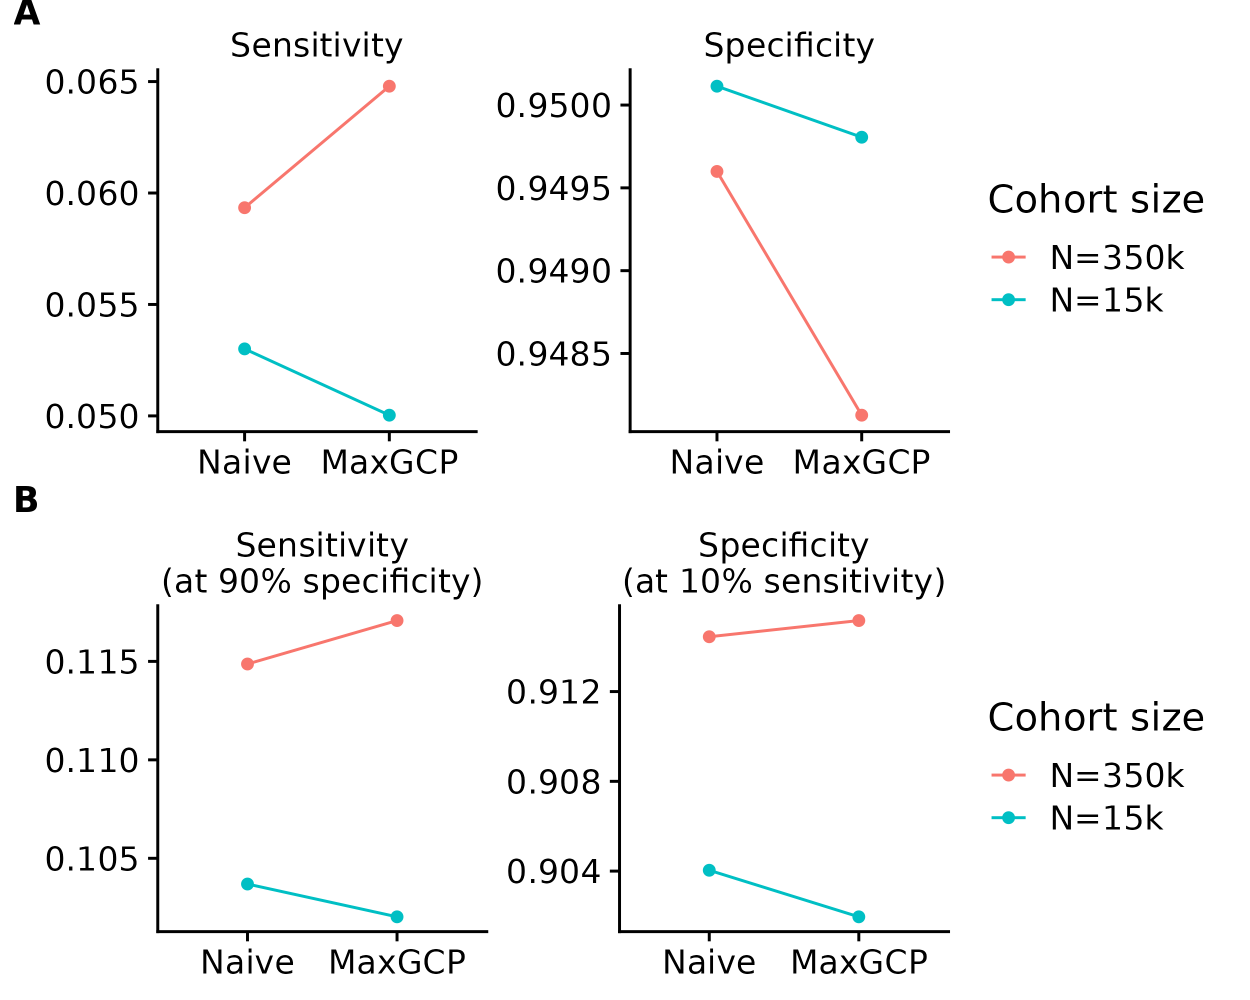

In [84]:
raw_plot <- ggdraw() + "3.alzheimers/img/sens_spec.png" %>% image_read %>% draw_image
tar_plot <- ggdraw() + "3.alzheimers/img/target_sens_spec.png" %>% image_read %>% draw_image

options(repr.plot.width = 5., repr.plot.height = 4, repr.plot.res = 250)

merged_plot <- plot_grid(
    raw_plot,
    tar_plot,
    ncol = 1,
    labels = "AUTO",
    align = "hv",
    axis = "tb",
    label_size = 10,
    rel_widths = c(1, 0.35),
    label_x = c(0, 0),
    label_y = c(0.975, 1)
)

# save_plot("img/alz_sens_spec.png", merged_plot, base_width = 5, base_height = 4, 
#           dpi = 400, bg = "white")

merged_plot

# Combine plots internally

In [2]:
summary_df <- bind_rows(
    read_parquet("2.megastroke/plot_data/summary.parquet") %>%
        rename(phenotype = mega_type) %>%
        mutate(phenotype = str_c(phenotype, " stroke")),
    read_parquet("3.alzheimers/plot_data/summary.parquet") %>%
        mutate(phenotype = "Alzheimer's")
) %>%
    pivot_longer(c(sensitivity, specificity), names_to = "metric") %>%
    mutate(metric = metric %>% str_to_sentence) %>%
    select(phenotype, phenotype_id, metric, value)

summary_df %>% head(2)

phenotype,phenotype_id,metric,value
<chr>,<fct>,<chr>,<dbl>
Any stroke,MaxGCP (N=350k),Sensitivity,0.1200761
Any stroke,MaxGCP (N=350k),Specificity,0.9100777


In [3]:
target_summary_df <- bind_rows(
    read_parquet("2.megastroke/plot_data/target_sensitivity_specificity.parquet") %>%
        rename(phenotype = mega_type) %>%
        mutate(phenotype = str_c(phenotype, " stroke")),
    read_parquet("3.alzheimers/plot_data/target_sensitivity_specificity.parquet") %>%
        mutate(phenotype = "Alzheimer's")
)

target_summary_df %>% head(2)

phenotype,phenotype_id,metric,value
<chr>,<fct>,<chr>,<dbl>
Any stroke,MaxGCP (N=350k),Sensitivity (at 90% specificity),0.1303610
Any stroke,Naive (N=350k),Sensitivity (at 90% specificity),0.1139127


In [4]:
full_summary_df <- bind_rows(
    summary_df,
    target_summary_df
) %>%
    mutate(
        phenotype_id = phenotype_id %>% 
            str_replace(" \\(", "\t\\(") %>%
            factor(levels = c("MaxGCP\t(N=350k)", "Naive\t(N=350k)", "MaxGCP\t(N=15k)", "Naive\t(N=15k)")),
        phenotype = phenotype %>%
            factor(levels = c("Any stroke", "Ischemic stroke", "Cardioembolic stroke", 
                              "Small vessel stroke", "Alzheimer's")),
        metric = fct_inorder(metric),
    )

annotation_df <- data.frame(
    metric = c("Sensitivity", "Specificity", "Sensitivity\n(at 90% specificity)", "Specificity\n(at 10% sensitivity)"), 
    label = c("A", "B", "C", "D")
) %>%
    mutate(metric = factor(metric, levels = c("Sensitivity", "Specificity", "Sensitivity\n(at 90% specificity)", 
                                              "Specificity\n(at 10% sensitivity)")))

full_summary_df %>% head(2)

phenotype,phenotype_id,metric,value
<fct>,<fct>,<fct>,<dbl>
Any stroke,MaxGCP (N=350k),Sensitivity,0.1200761
Any stroke,MaxGCP (N=350k),Specificity,0.9100777


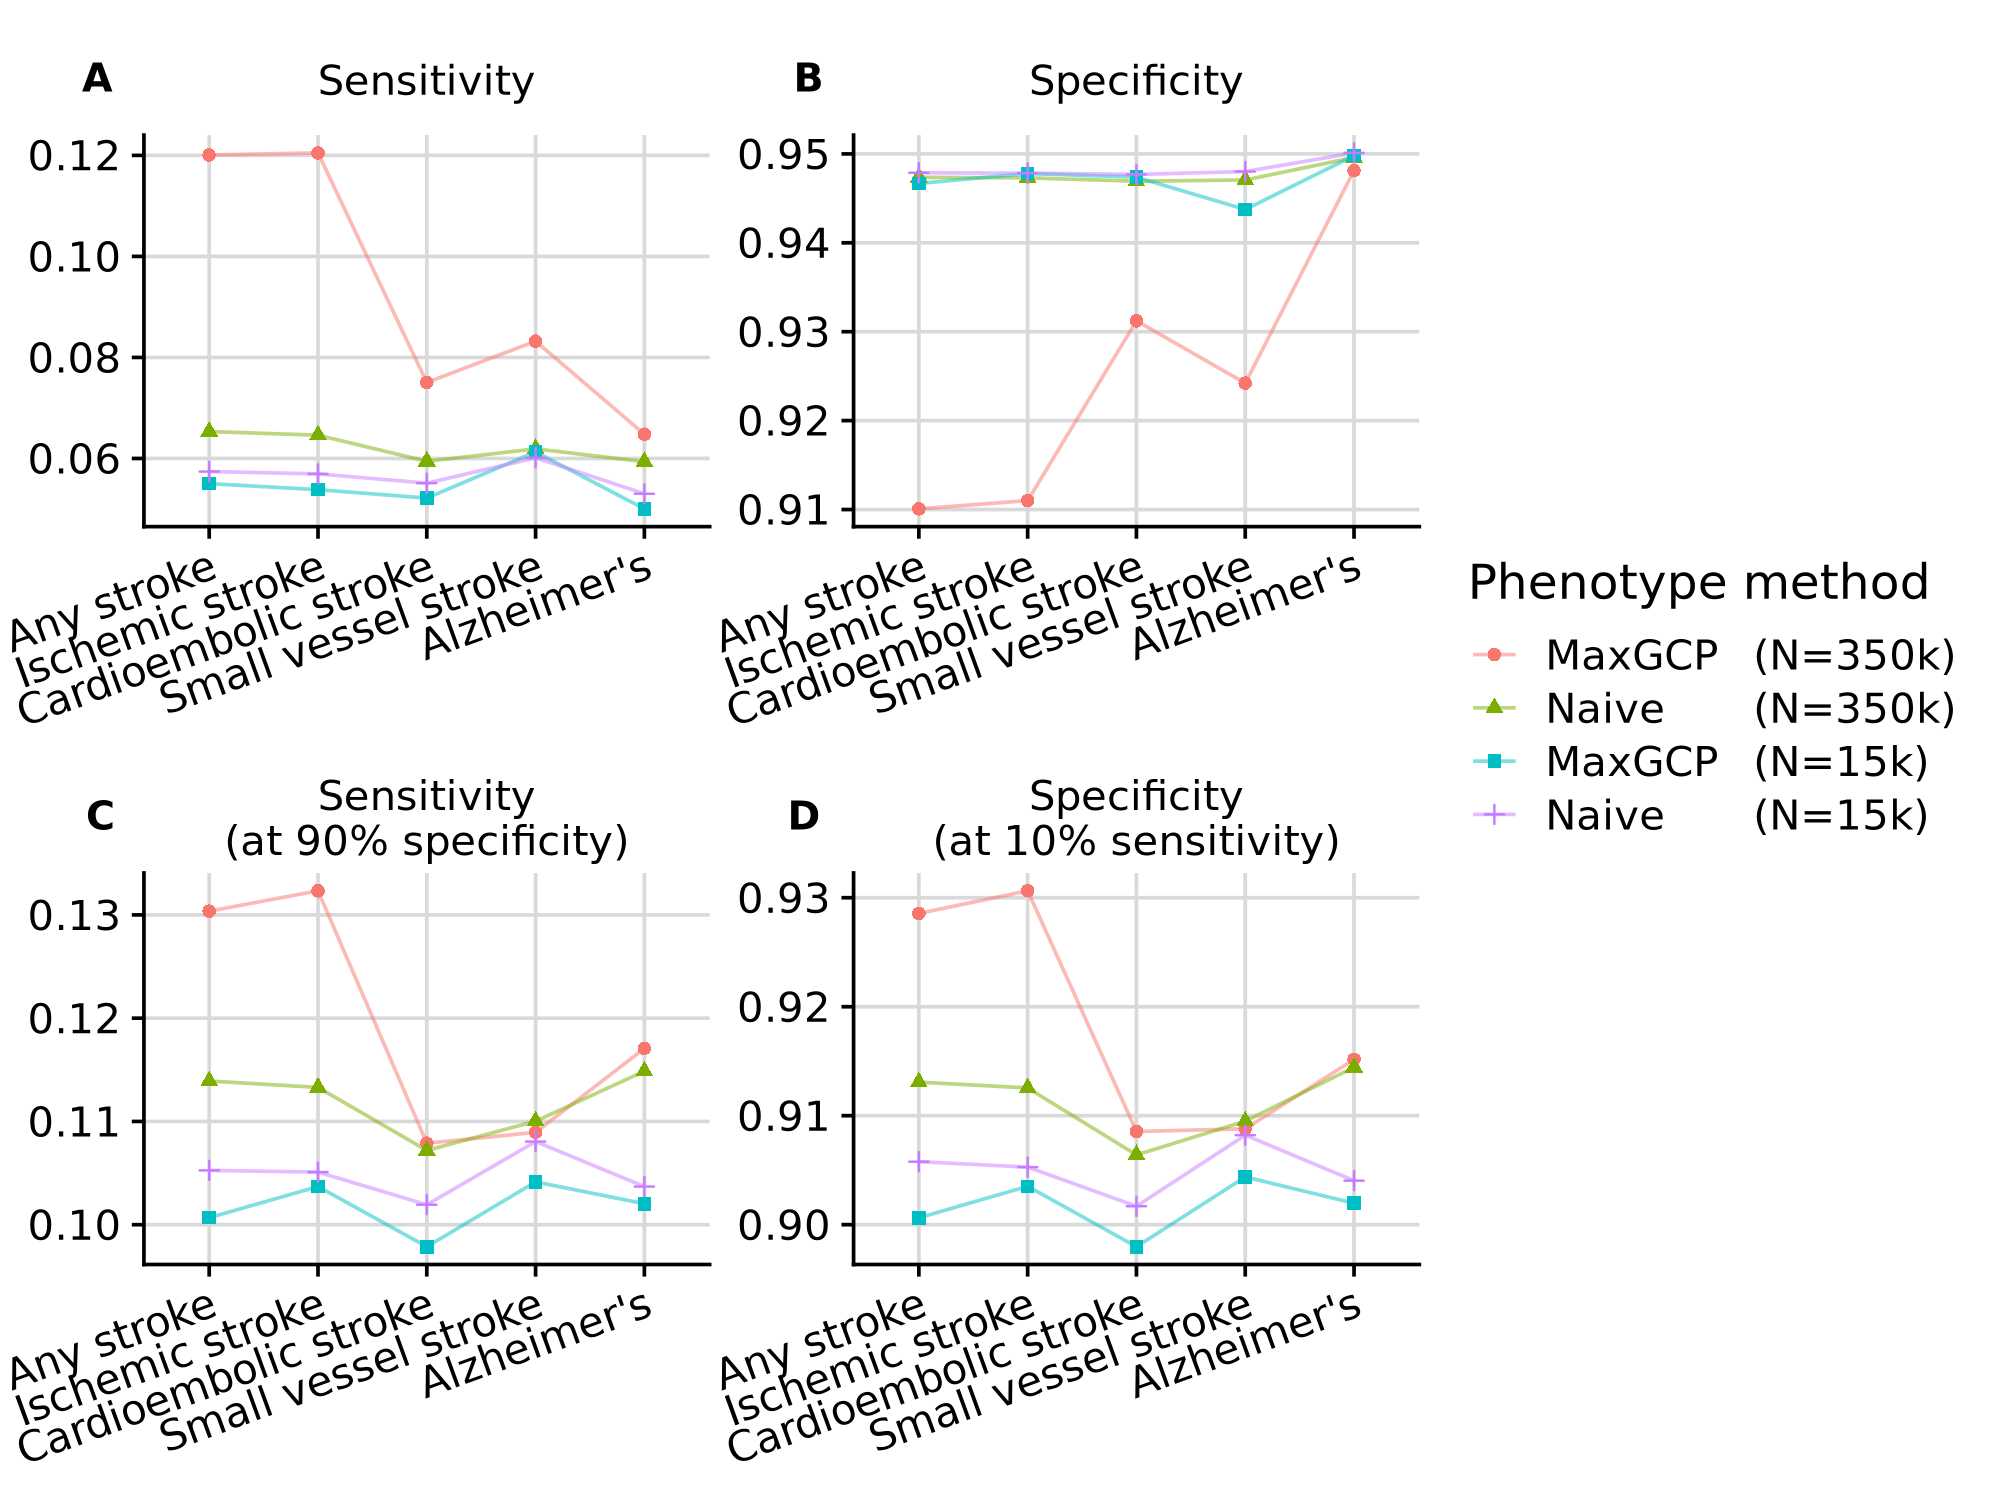

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 250)

full_summary_plot <- full_summary_df %>%
    ggplot(aes(x = phenotype, y = value, color = phenotype_id, group = phenotype_id, shape = phenotype_id)) +
    geom_line(alpha = 0.5) +
    geom_point() +
    facet_wrap(vars(metric), scales = "free") +
    theme_cowplot() +
    background_grid() +
    xlab("Stroke type") +
    scale_color_discrete(name = "Phenotype method") +
    scale_shape_discrete(name = "Phenotype method") +
    theme(
        axis.text.x = element_text(angle = 20, hjust = 1),
        axis.title = element_blank(),
        strip.background = element_blank(),
    ) +
    coord_cartesian(clip = "off") +
    geom_text(
        data = annotation_df, aes(label = label, color = NULL, shape = NULL, group = NULL, x = -Inf, y = Inf),
        hjust = 2, vjust = -1.5, fontface = "bold", show.legend = F, size = 4
    )

save_plot("img/sens_spec.png", full_summary_plot, base_width =8, base_height = 6, 
          dpi = 400, bg = "white")

full_summary_plot